In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors


In [2]:
# Load the labeled dataset .mat file
file_path = "nyu_depth_v2_labeled.mat"  # Replace with your .mat file path

In [3]:
data = h5py.File(file_path, 'r')

In [4]:
# Access variables
images = data['images']      # RGB images (H x W x 3 x N)
depths = data['depths']      # Depth maps (H x W x N)
labels = data['labels']      # Object labels (H x W x N)
names = data['names']        # Class names (C x 1 cell array)


In [5]:
print("Images shape:", images.shape)
print("Depths shape:", depths.shape)
print("Labels shape:", labels.shape)


Images shape: (1449, 3, 640, 480)
Depths shape: (1449, 640, 480)
Labels shape: (1449, 640, 480)


In [6]:
def extract_names(names_dataset):
    names_list = []
    for i in range(names_dataset.shape[0]):
        ref = names_dataset[i][0]
        name_dataset = data[ref]
        char_codes = name_dataset[()]
        char_codes = char_codes.flatten()
        name = ''.join(chr(c) for c in char_codes)
        names_list.append(name)
    return names_list

In [17]:
class_names = extract_names(names)
print(class_names)

['book']


In [8]:
def read_image(index):
    img = images[index]  # Shape: (3, 640, 480)
    img = np.array(img).astype(np.uint8)
    print("Image shape after reading:", img.shape)
    img = img.transpose(1, 2, 0)  # Transpose to (640, 480, 3)
    print("Image shape after transpose:", img.shape)
    return img


In [9]:
def read_depth(index):
    depth = depths[index]  # Shape: (640, 480)
    depth = np.array(depth)
    print("Depth shape after reading:", depth.shape)
    # No need to transpose
    return depth

In [10]:
def read_label(index):
    label = labels[index]  # Shape: (640, 480)
    label = np.array(label)
    print("Label shape after reading:", label.shape)
    # No need to transpose
    return label

In [11]:
# Select the image index to visualize
i = 0  # Change this index to visualize different images

In [12]:
# Read data
img = read_image(i)
depth = read_depth(i)
label = read_label(i)

Image shape after reading: (3, 640, 480)
Image shape after transpose: (640, 480, 3)
Depth shape after reading: (640, 480)
Label shape after reading: (640, 480)


(np.float64(-0.5), np.float64(479.5), np.float64(639.5), np.float64(-0.5))

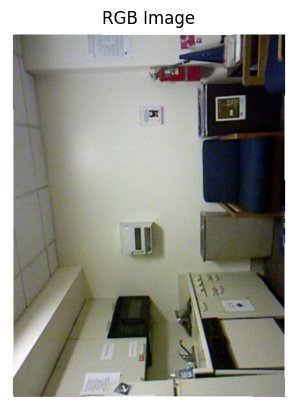

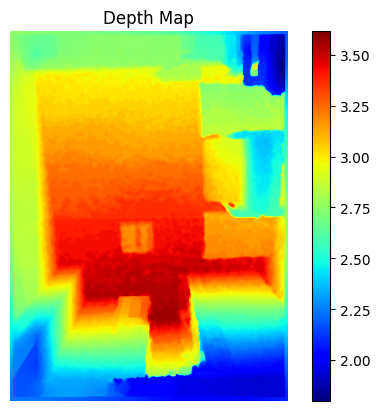

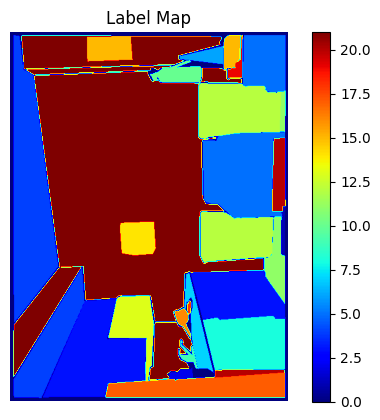

In [13]:
# Display the RGB image
plt.figure()
plt.imshow(img)
plt.title('RGB Image')
plt.axis('off')

# Display the depth map
plt.figure()
plt.imshow(depth, cmap='jet')
plt.title('Depth Map')
plt.colorbar()
plt.axis('off')

# Display the label map
plt.figure()
plt.imshow(label, cmap='jet')
plt.title('Label Map')
plt.colorbar()
plt.axis('off')

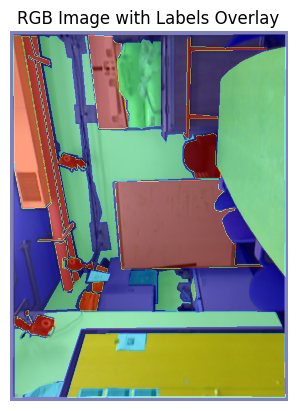

In [16]:
# Overlay labels on the RGB image
num_classes = int(label.max()) + 1
cmap = plt.get_cmap('jet', num_classes)
norm = colors.BoundaryNorm(
    boundaries=np.arange(-0.5, num_classes, 1),
    ncolors=num_classes
)

plt.figure()
plt.imshow(img)
plt.imshow(label, cmap=cmap, norm=norm, alpha=0.5)
plt.title('RGB Image with Labels Overlay')
plt.axis('off')
plt.show()


In [15]:
for i in range(5):  # Visualize the first 5 images
    img = read_image(i)
    depth = read_depth(i)
    label = read_label(i)
    # Visualization code here


Image shape after reading: (3, 640, 480)
Image shape after transpose: (640, 480, 3)
Depth shape after reading: (640, 480)
Label shape after reading: (640, 480)
Image shape after reading: (3, 640, 480)
Image shape after transpose: (640, 480, 3)
Depth shape after reading: (640, 480)
Label shape after reading: (640, 480)
Image shape after reading: (3, 640, 480)
Image shape after transpose: (640, 480, 3)
Depth shape after reading: (640, 480)
Label shape after reading: (640, 480)
Image shape after reading: (3, 640, 480)
Image shape after transpose: (640, 480, 3)
Depth shape after reading: (640, 480)
Label shape after reading: (640, 480)
Image shape after reading: (3, 640, 480)
Image shape after transpose: (640, 480, 3)
Depth shape after reading: (640, 480)
Label shape after reading: (640, 480)
